In [6]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# Import data
df = pd.read_csv('../data/processed/csv/cleaned/survey_data.csv')

# Assign numeric values to categorical values
ordinal_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

df = df.replace(ordinal_mapping)

display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 91 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ward                                296 non-null    object 
 1   gender                              296 non-null    object 
 2   age                                 296 non-null    float64
 3   education                           296 non-null    object 
 4   monthly_income                      296 non-null    float64
 5   household_size                      296 non-null    float64
 6   family_head                         296 non-null    object 
 7   value_chain                         296 non-null    object 
 8   vc_experience                       296 non-null    float64
 9   project_skepticism                  296 non-null    int64  
 10  adequate_consultation               296 non-null    int64  
 11  project_acceptance                  296 non-n

,ward,gender,age,education,monthly_income,household_size,family_head,value_chain,vc_experience,project_skepticism,...,trained_vaccination,adopted_vaccination,trained_hygiene_management,adopted_hygiene_management,enterprise_profitability_increase,farm_productivity_increase,timely_implementation,new_income_streams,job_creation_increase,project_inclusivity
0,Tulimani,Male,67.0,Secondary,20000.0,4.0,Yes,Tomato,20.0,5,...,NaN,NaN,NaN,NaN,5,5,5,5,5,5
1,Tulimani,Female,33.0,Primary,5000.0,3.0,No,Tomato,5.0,5,...,NaN,NaN,NaN,NaN,5,5,5,5,5,5
2,Tulimani,Female,73.0,Primary,800.0,6.0,No,Tomato,2.0,5,...,NaN,NaN,NaN,NaN,5,5,4,5,5,5
3,Tulimani,Male,71.0,Secondary,10000.0,5.0,Yes,Tomato,5.0,5,...,NaN,NaN,NaN,NaN,5,5,5,5,5,5
4,Tulimani,Female,50.0,Primary,20000.0,6.0,No,Tomato,5.0,5,...,NaN,NaN,NaN,NaN,5,5,5,5,5,5


None

In [8]:
# Unique values 'Value Chain' column
print(df['value_chain'].unique())

['Tomato' 'Mango' 'Green gram' 'Indigenous chicken']


In [9]:
mango = df[df['value_chain'] == 'Mango']
tomato = df[df['value_chain'] == 'Tomato']
green_gram = df[df['value_chain'] == 'Green gram']
indigenous_chicken = df[df['value_chain'] == 'Indigenous chicken']

for df_ in [mango, tomato, green_gram, indigenous_chicken]:
    # sns.heatmap(df_.isnull(), cbar=False)
    # plt.show()
    # Drop columns missing values
    df_.dropna(axis=1, how='all', inplace=True)
    df_.dropna(axis=0, how='any', inplace=True)
    # sns.heatmap(df_.isnull(), cbar=False)
    # plt.show()

C:\Users\kisee\AppData\Local\Temp\ipykernel_15396\1715771358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.dropna(axis=1, how='all', inplace=True)
C:\Users\kisee\AppData\Local\Temp\ipykernel_15396\1715771358.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.dropna(axis=0, how='any', inplace=True)
C:\Users\kisee\AppData\Local\Temp\ipykernel_15396\1715771358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.dropn

In [10]:
for df_ in [mango, tomato, green_gram, indigenous_chicken]:
    # Print dataset name from globals()
    print([k for k, v in globals().items() if v is df_][0])
    print(df_.info())
# 
# display(tomato.head(), tomato.info())
# 
# # Print missing values
# print(tomato.isnull().sum())

mango
<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 46 to 94
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ward                                49 non-null     object 
 1   gender                              49 non-null     object 
 2   age                                 49 non-null     float64
 3   education                           49 non-null     object 
 4   monthly_income                      49 non-null     float64
 5   household_size                      49 non-null     float64
 6   family_head                         49 non-null     object 
 7   value_chain                         49 non-null     object 
 8   vc_experience                       49 non-null     float64
 9   project_skepticism                  49 non-null     int64  
 10  adequate_consultation               49 non-null     int64  
 11  project_acceptance                  49 non-nu

In [11]:
# Print each column name
for i, col in enumerate(df.columns):
    print(i, col)

0 ward
1 gender
2 age
3 education
4 monthly_income
5 household_size
6 family_head
7 value_chain
8 vc_experience
9 project_skepticism
10 adequate_consultation
11 project_acceptance
12 satisfactory_training
13 project_success_optimism
14 project_benefits
15 sustainable_skills
16 sustainable_technology
17 project_understanding
18 vc_understanding
19 vc_agriculture_practices_awareness
20 vc_technology_awareness
21 vc_product_marketing_understanding
22 practice_mixed_farming
23 practice_large_scale_farming
24 use_extension_services
25 use_credit_farming
26 full_time_farming
27 acreage_before
28 acreage_after
29 acreage_change
30 yield_before
31 yield_after
32 yield_change
33 price_before
34 price_after
35 price_change
36 annual_income_before
37 annual_income_after
38 annual_income_change
39 jobs_created_before
40 jobs_created_after
41 jobs_created_change
42 trained_certified_seed
43 adopted_certified_seed
44 trained_improved_varieties
45 adopted_improved_varieties
46 trained_pest_management

,trained_vaccination,adopted_vaccination,trained_hygiene_management,adopted_hygiene_management,enterprise_profitability_increase,farm_productivity_increase
value_chain,,,,,,
Tomato,NaN,NaN,NaN,NaN,5,5
Tomato,NaN,NaN,NaN,NaN,5,5
Tomato,NaN,NaN,NaN,NaN,5,5
Tomato,NaN,NaN,NaN,NaN,5,5
Tomato,NaN,NaN,NaN,NaN,5,5
...,...,...,...,...,...,...
Indigenous chicken,Yes,Yes,Yes,Yes,4,4
Indigenous chicken,Yes,Yes,Yes,Yes,4,4
Indigenous chicken,Yes,Yes,Yes,Yes,4,4


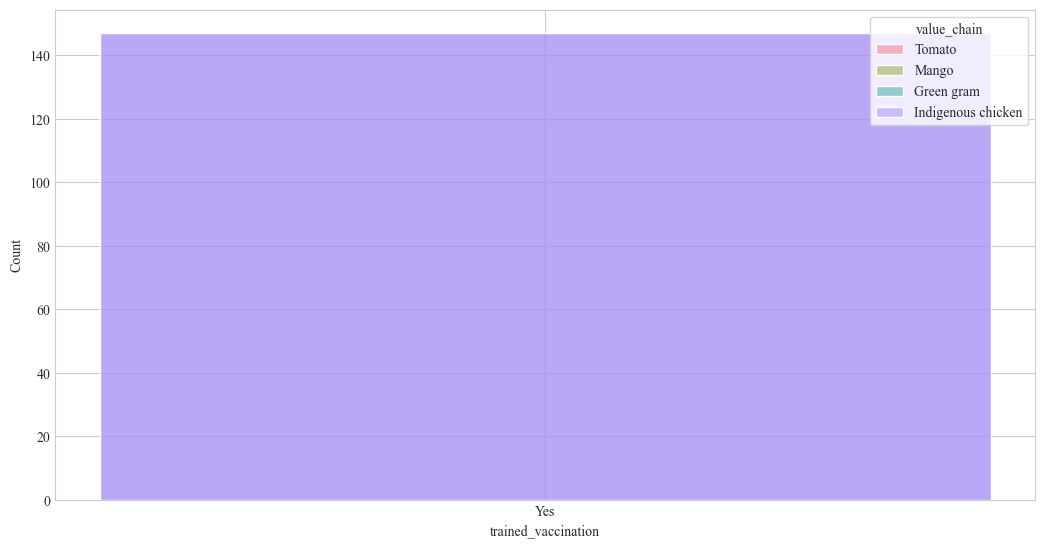

In [12]:
temp_df = df.set_index('value_chain')[df.columns[[81,82,83,84,85,86]]]

display(temp_df)

# plot histograms for first two columns of temp_df 
plt.figure(figsize=(10, 5))

sns.histplot(data=temp_df.reset_index(), x=temp_df.columns[0], hue='value_chain')
sns.histplot(data=temp_df.reset_index(), x=temp_df.columns[1], hue='value_chain')
plt.show()

In [13]:
# temp_df[temp_df.columns[:2]].groupby('value_chain').sum().plot(kind='bar', figsize=(10, 5))

TypeError: no numeric data to plot

In [ ]:
# for col in df.columns[107:-6]:
#     print(col)
#     
# df_replace = df.dropna(subset=df.columns[107:-6])

In [22]:
demographics = df.iloc[:, 0:9]
attitudes = df.iloc[:, 9:17]
knowledge = df.iloc[:, 17:22]
practices = df.iloc[:, 22:27]
vc_performance = df.filter(regex='change|adopted')
performance_ = df.iloc[:, -6:]
# # Change all the values in attitudes, knowledge, practices, and performance_ to categorical
# for col in demographics.columns[[0, 1, 3, 6, 7]]:
#     demographics[col] = demographics[col].astype('category')
# for col in attitudes.columns:
#     attitudes[col] = attitudes[col].astype('category')
# for col in knowledge.columns:
#     knowledge[col] = knowledge[col].astype('category')
# for col in practices.columns:
#     practices[col] = practices[col].astype('category')
# for col in performance_.columns:
#     performance_[col] = performance_[col].astype('category')

# # Use matplotlib to plot missing values from performance
# plt.figure(figsize=(50, 20))
# sns.heatmap(df.isnull(), cbar=False)
# # plt.savefig('../results/images/missing_values.png')
# plt.show()
# plt.figure(figsize=(30,10))
# sns.heatmap(df_replace.isnull(), cbar=False)
# plt.show()

print(demographics.info(), attitudes.info(), knowledge.info(), practices.info(), performance_.info())
demographics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               296 non-null    float64
 1   monthly_income    296 non-null    float64
 2   household_size    296 non-null    float64
 3   vc_experience     296 non-null    float64
 4   ward_Mtito Andei  296 non-null    bool   
 5   ward_Thange       296 non-null    bool   
 6   ward_Tulimani     296 non-null    bool   
 7   ward_Waia/Kako    296 non-null    bool   
 8   gender_Female     296 non-null    bool   
dtypes: bool(5), float64(4)
memory usage: 10.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender_Male            296 non-null    bool 
 1   education_Certificate  296 non-null    bool 
 2   education_Degree    

,age,monthly_income,household_size,vc_experience,ward_Mtito Andei,ward_Thange,ward_Tulimani,ward_Waia/Kako,gender_Female
0,67.0,20000.0,4.0,20.0,False,False,True,False,False
1,33.0,5000.0,3.0,5.0,False,False,True,False,True
2,73.0,800.0,6.0,2.0,False,False,True,False,True
3,71.0,10000.0,5.0,5.0,False,False,True,False,False
4,50.0,20000.0,6.0,5.0,False,False,True,False,True


In [23]:
# Convert object type cols in demographics to category type
for col in demographics.columns:
    if demographics[col].dtype == 'object':
        demographics[col] = demographics[col].astype('category')
        
# Sample 

# One hot encode 'category' columns in demographics
demographics = pd.get_dummies(demographics)

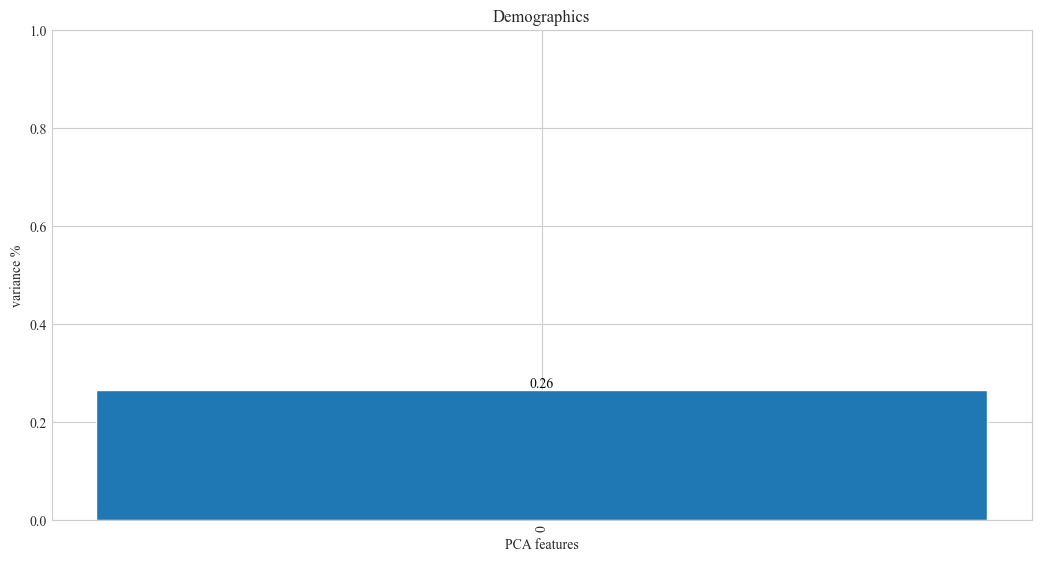

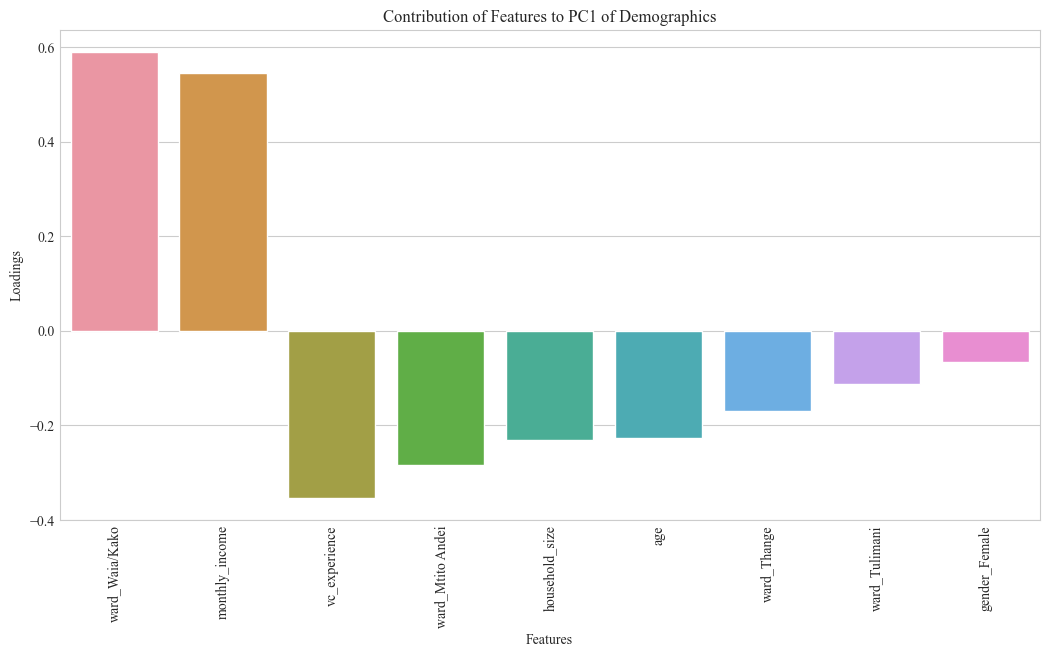

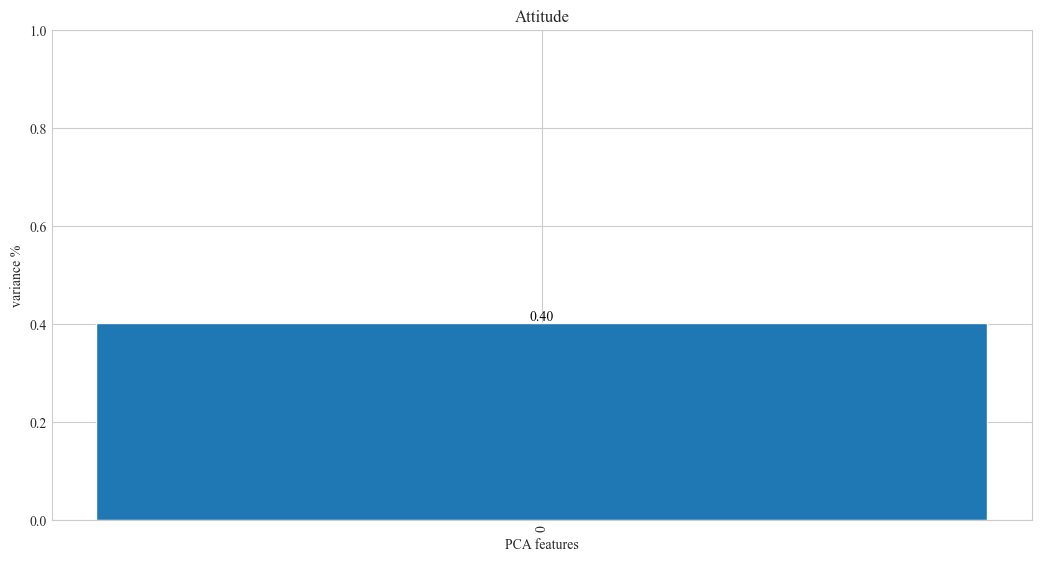

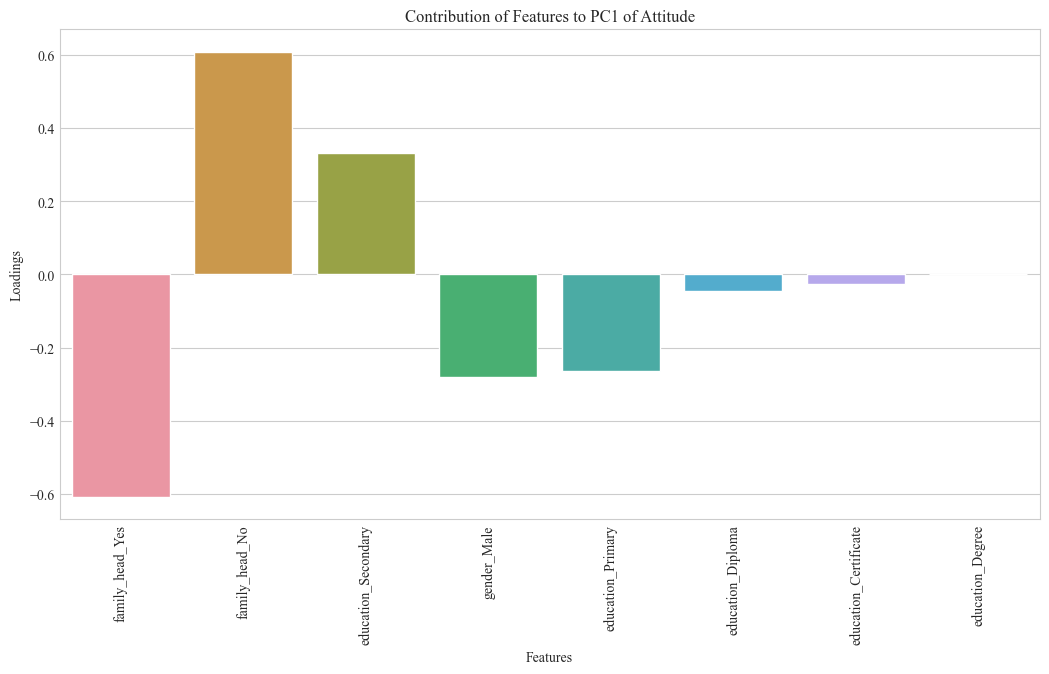

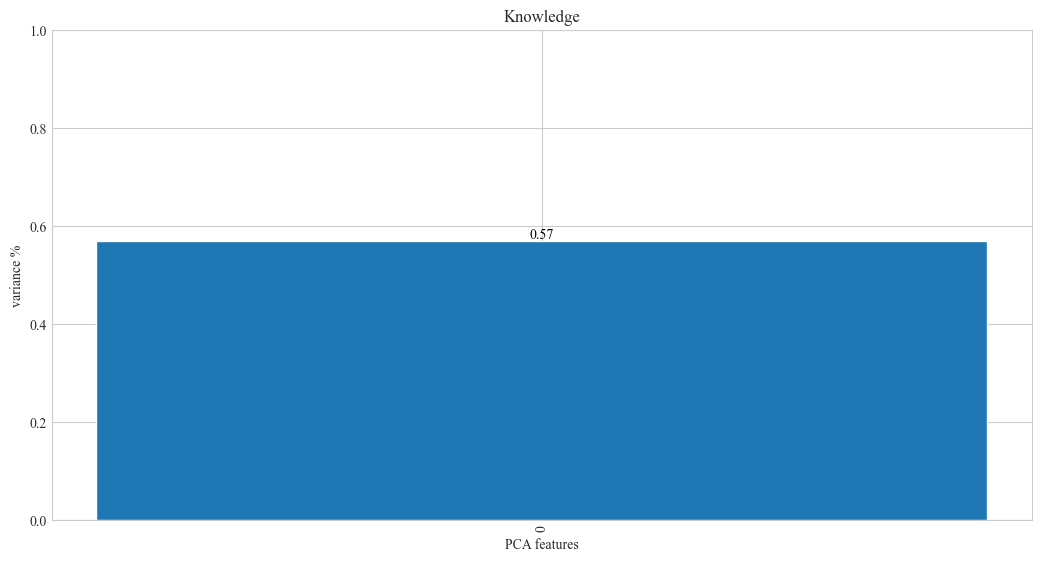

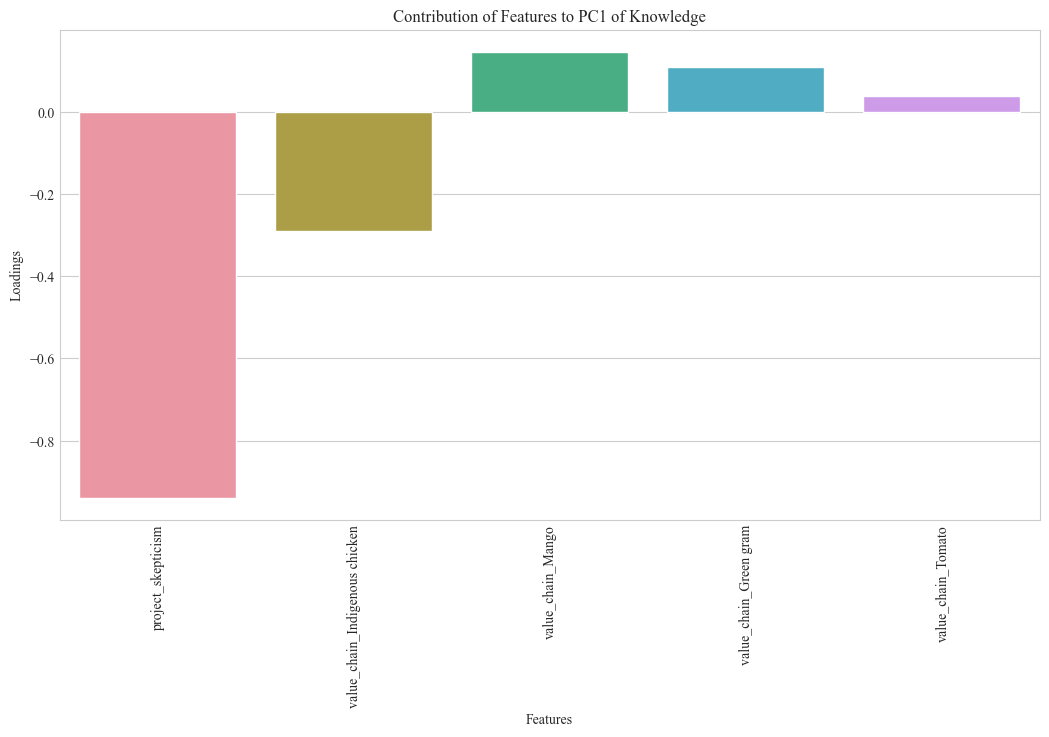

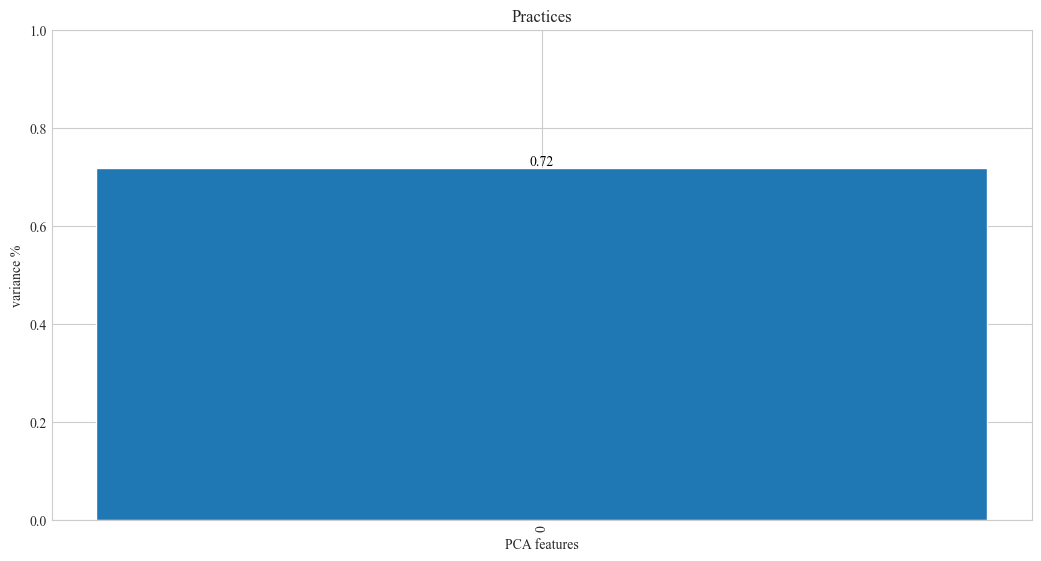

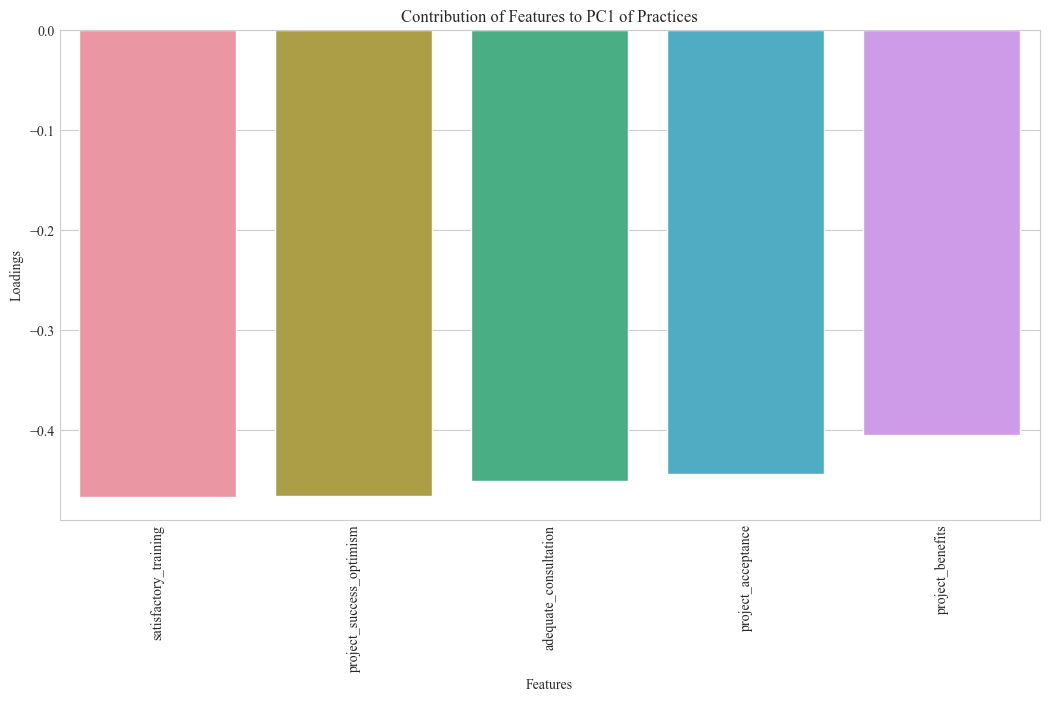

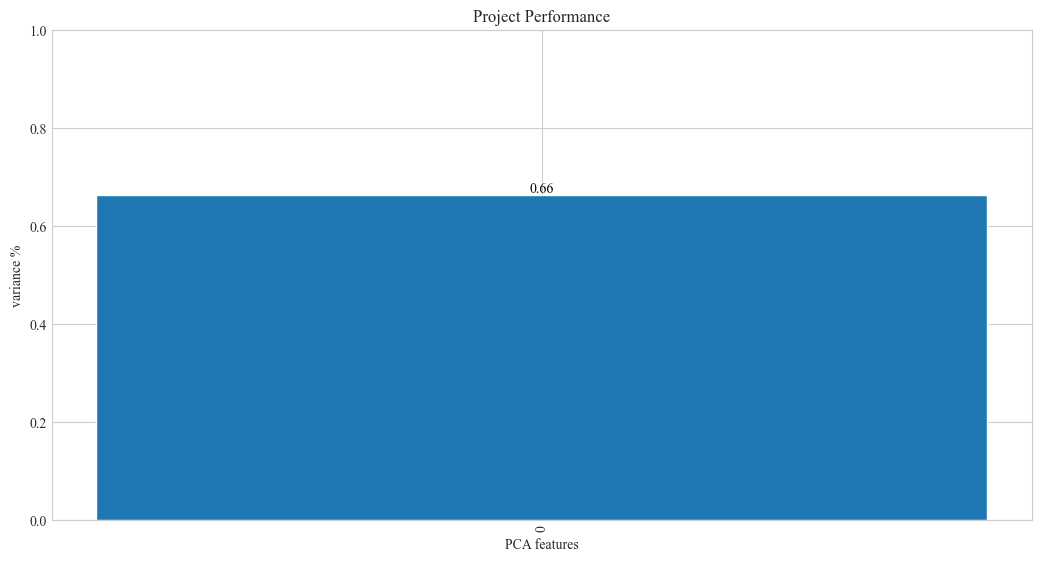

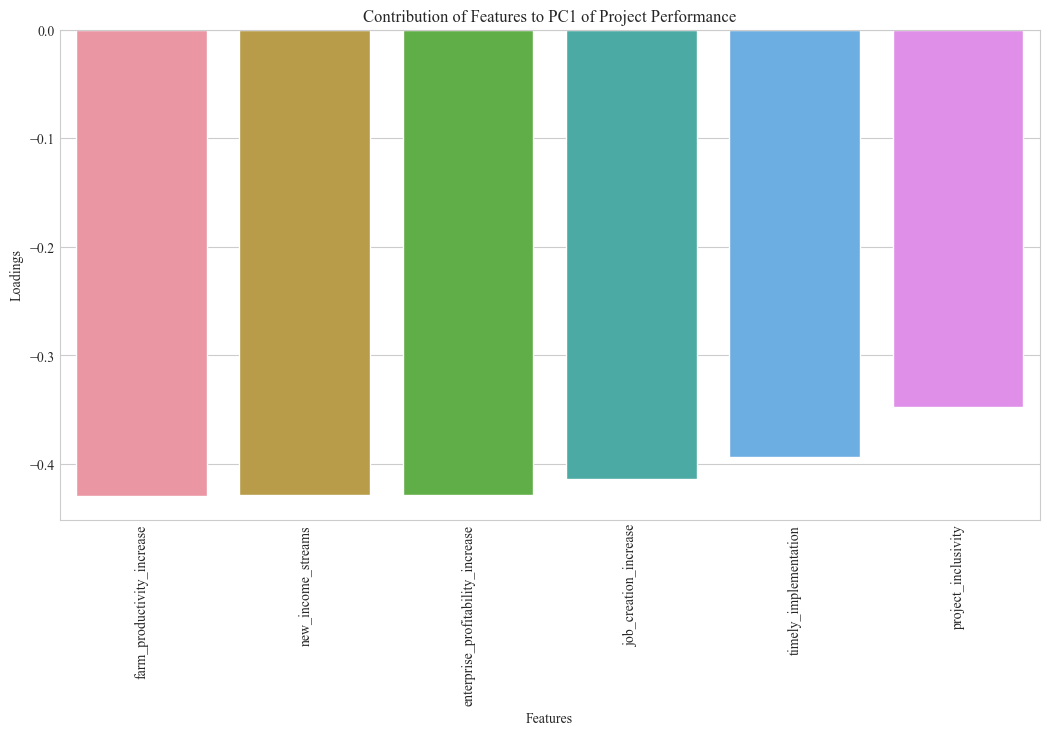

In [24]:
def perform_pca(dataframe: pd.DataFrame, scale: bool = False, n_components: any="mle", df_name: str=None):
    columns = dataframe.columns
    
    if scale:
        scaler = StandardScaler()
      
        dataframe = scaler.fit_transform(dataframe)
        
    def reduce(df: pd.DataFrame, n_components: any = n_components):
        
        pca = PCA(n_components=n_components)
        r_df = pd.DataFrame(pca.fit_transform(df))
        r_df.columns = [f"{df_name} PC{i+1}" for i in range(r_df.shape[1])]
        components = range(pca.n_components_)
        evr = pca.explained_variance_ratio_
        loadings = pca.components_
        n_pcs = pca.n_components_
        
        return r_df, components, evr, loadings, n_pcs


    def plot_pcav(features,
                  evr, name=df_name):
        plt.figure(figsize=(10, 5))
        plt.bar(features, evr)
        plt.ylim(0,1)
        plt.xlabel("PCA features")
        plt.ylabel("variance %")
        plt.xticks(features, rotation=90)
        if type(name) == str:
            plt.title(name)
        for i, v in enumerate(evr):
            plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom')
        plt.show()


    def plot_pcal(columns, loadings: np.ndarray, n_pcs: int, df_name=df_name):
        for i in range(n_pcs):
            sorted_idx = np.argsort(np.abs(loadings[i, :]))[::-1]  # Get indices of the sorted loadings in descending order
            sorted_columns = np.array(columns)[sorted_idx]  # Sort the columns based on the sorted indices
            sorted_loadings = loadings[i, sorted_idx]  # Sort the loadings based on the sorted indices
    
            plt.figure(figsize=(10, 5))
            sns.barplot(x=sorted_columns, y=sorted_loadings)
            plt.xticks(rotation=90)
            plt.xlabel("Features")
            plt.ylabel("Loadings")
            plt.title(f"Contribution of Features to PC{i+1} of {df_name}")
            plt.show()

    r_df, components, evr, loadings, n_pcs = reduce(dataframe)
    plot_pcav(components, evr)
    plot_pcal(columns, loadings, n_pcs)
    rr_df, _, _, _, _ = reduce(r_df, n_components=n_pcs)
    # plot_pcav(components, evr)
    
    return r_df, rr_df

demg, demg2 = perform_pca(demographics, n_components=1, scale=True, df_name="Demographics")
attd, attd2 = perform_pca(attitudes, n_components=1, df_name="Attitude")
know, know2 = perform_pca(knowledge, n_components=1, df_name="Knowledge")
prac, prac2 = perform_pca(practices, n_components=1, df_name="Practices")
perf, perf2 = perform_pca(performance_, n_components=1, df_name="Project Performance")

df = pd.concat([demographics, attitudes, knowledge, practices, performance_], axis=1)

In [26]:
# Create a performance index by averaging the performance columns
data = pd.DataFrame()

data['Performance Index'] = performance_.mean(axis=1)
data = pd.concat([data, demographics], axis=1)
# data["Demographic Index"] = demg.mean(axis=1)
data['Attitude Index'] = attitudes.mean(axis=1)
data['Knowledge Index'] = knowledge.mean(axis=1)
data['Practice Index'] = practices.mean(axis=1)
# Convert all bool to int
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype('int')

data_pca = pd.concat([perf, attd, know, prac], axis=1)
# Save the dataframe to a csv file
data_pca.to_csv('../data/processed/PCA_reduced_data.csv', index=False)

# Log transform the performance index
c = abs(data['Performance Index'].min()) + 1
data['Performance Index'] = np.log(data['Performance Index'] + c)
c_ = abs(data_pca['Project Performance PC1'].min()) + 1
data_pca['Project Performance'] = np.log(data_pca['Project Performance'] + c_)
# Save the dataframe to a csv file
data.to_csv('../data/processed/PCA_transformed_data.csv', index=False)

# Log transform knowledge and attitude indices
# for col in data_pca.columns:
#     c = abs(data_pca[col].min()) + 1
#     data_pca[col] = np.log(data_pca[col] + c)



# Box cox transform the performance index
# data['Performance Index'] = stats.boxcox(data['Performance Index'] + c)[0]
# data_pca['Project Performance PC1'] = stats.boxcox(data_pca['Project Performance PC1'] + c_)[0]

# Winsoring the whole dataframe
# for col in data.columns:
#     if (data[col].dtype == 'float') or (data[col].dtype == 'int'):
#         data[col] = stats.mstats.winsorize(data[col], limits=[0.01, 0.01])
#         
# for col in data_pca.columns:
#     if (data_pca[col].dtype == 'float') or (data_pca[col].dtype == 'int'):
#         data_pca[col] = stats.mstats.winsorize(data_pca[col], limits=[0.01, 0.01])

# sns.pairplot(data, corner=True)
# plt.show()
# sns.pairplot(data=data_pca, y_vars='Project Performance', x_vars=data_pca.columns[1:],
#              kind='reg')
# plt.show()
# Plot a histogram and boxplot of all the columns
# for col in data.columns:
#     # The top row of the subplots is for the histogram, 8 height
#     # The bottom row of the subplots is for the boxplot, 2 height oriented
#     fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [8, 2]})
#     sns.histplot(data[col], ax=ax[0])
#     sns.boxplot(data[col], ax=ax[1], orient='h')
#     plt.show()
#     
for col in data_pca.columns:
    fig, ax = plt.subplots(2, 1, figsize=(10, 5),
                           gridspec_kw={'height_ratios': [7.5, 2.5]}, sharex=True)
    sns.histplot(data_pca[col], ax=ax[0])
    sns.boxplot(data_pca[col], ax=ax[1], orient='h')
    plt.suptitle(col)
    plt.tight_layout()
    plt.show()
    

# Correlation matrix ("Pearson's r") of the performance index and the other indices
corr = data.corr()
corr_pca = data_pca.corr()

# display(corr)
display(corr_pca)

# Plot correlation matrix
# plt.figure(figsize=(30, 30))
# sns.heatmap(corr, annot=True)
# plt.title("Correlation Matrix")
# plt.show()

# Plot correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr_pca, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix (PCA)")
plt.show()


# Plot correlation bar plot with "Performance Index" as the target
# Annotate each bar with the correlation value
plt.figure(figsize=(10, 5))
sns.barplot(x=corr['Performance Index'].index, y=corr['Performance Index'].values)
plt.xticks(rotation=90)
for i, v in enumerate(corr['Performance Index'].values):
    # If positive, annotate above the bar, else annotate below the bar
    if v > 0:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom')
    else:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='top')
plt.title("Correlation of Performance Index with Other Indices (Original)")
# plt.yticks([])
plt.show()

# Plot correlation bar plot with "Performance Index" as the target
# Annotate each bar with the correlation value
plt.figure(figsize=(10, 5))
sns.barplot(x=corr_pca['Project Performance'].index, y=corr_pca['Project Performance'].values)
plt.xticks(rotation=90)
for i, v in enumerate(corr_pca['Project Performance'].values):
    # If positive, annotate above the bar, else annotate below the bar
    if v > 0:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom')
    else:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='top')
plt.title("Correlation of Performance Index with Other Indices (PCA)")
# plt.yticks([])
plt.show()

# Scatter both Performance Indices
# plt.figure(figsize=(10, 5))
# plt.scatter(x=data['Performance Index'], y=data_pca['Project Performance PC1'])
# plt.xlabel("Performance Index")
# plt.ylabel("Performance Index (PCA)")
# plt.title("Performance Index vs. Performance Index (PCA)")
# plt.show()

# Filter columns with correlation > 0.2
corr = corr[(corr['Performance Index'] > 0.05) | (corr['Performance Index'] < -0.05)]
corr_pca = corr_pca[(corr_pca['Project Performance'] > 0.05) | (corr_pca['Project Performance'] < -0.05)]

# Plot correlation
plt.figure(figsize=(10, 5))
sns.barplot(x=corr['Performance Index'].index, y=corr['Performance Index'].values)
plt.xticks(rotation=90)
for i, v in enumerate(corr['Performance Index'].values):
    # If positive, annotate above the bar, else annotate below the bar
    if v > 0:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom')
    else:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='top')
plt.title("Correlation of Performance Index with Other Indices (Filtered)")
# plt.yticks([])
plt.show()

# Plot correlation
plt.figure(figsize=(10, 5))
sns.barplot(x=corr_pca['Project Performance'].index, y=corr_pca['Project Performance'].values)
plt.xticks(rotation=90)
for i, v in enumerate(corr_pca['Project Performance'
                               ''
                               ''].values):
    # If positive, annotate above the bar, else annotate below the bar
    if v > 0:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom')
    else:
        plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='top')
plt.title("Correlation of Performance Index with Other Indices (Filtered, PCA))")
# plt.yticks([])
plt.show()

# Filter columns
# data_pca = data_pca[corr_pca.index]

# plot each original column's contribution to the chosen principal components
# plt.figure(figsize=(10, 5))
# plt.bar(x=data_pca.columns, height=abs(data_pca.corr()['Project Performance PC1'].values))
# plt.xticks(rotation=90)
# plt.title("Contribution of Each Column to the Principal Components")
# plt.show()

display(df.describe().round(2).T)
display(data_pca.describe().round(2).T)
# df_, df__ = perform_pca(df, True)

KeyError: 'Project Performance'

In [27]:
import statsmodels.api as sm

Y = data['Performance Index']
X = data.drop('Performance Index', axis=1)
X = sm.add_constant(X)

# display(X.info(), Y.info())

Y1 = data_pca['Project Performance PC1']
X1 = data_pca.drop('Project Performance PC1', axis=1)
X1 = sm.add_constant(X1)

# Summary statistics to 2dp
# display(X1.describe().round(2).T, Y1.describe().round(2).T)

model = sm.OLS(Y, X)
results = model.fit(cov_type='HC1')

model1 = sm.OLS(Y1, X1)
results1 = model1.fit(cov_type='HC1')

# print(results.summary2())

print(results.summary(yname="Log (Project Performance)",
                      # xname=["Constant", "Farmer Demographics", "Farmer Attitudes", "Farmer Knowledge", "Farmer Practices"],
                      title="NARIG Regression Results",
                      alpha=0.05,
                      slim=True
                      ),"\n\n",
      results1.summary(yname="Log (Project Performance)",
                       # xname=["Constant", "Farmer Demographics", "Farmer Attitudes", "Farmer Knowledge", "Farmer Practices"],
                      title="NARIG Regression Results",
                      alpha=0.05,
                      slim=True
                      ))

# Import vif function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# vif.round(2)

vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(2)

display(vif1)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Plot the residuals
plt.figure(figsize=(10, 5))
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
# Add a regression line
plt.plot(results.fittedvalues, np.zeros(len(results.fittedvalues)), color='red')
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.scatter(x=results1.fittedvalues, y=results1.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (PCA)")
# Add a regression line
plt.plot(results1.fittedvalues, np.zeros(len(results1.fittedvalues)), color='red')
plt.show()

# Normal probability plot
plt.figure(figsize=(10, 5))
stats.probplot(results.resid, plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()

# Normal probability plot
plt.figure(figsize=(10, 5))
stats.probplot(results1.resid, plot=plt)
plt.title("Normal Probability Plot of Residuals (PCA)")
plt.show()

# Homoscedasticity test
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print(f"Homoscedasticity test p-value: {pval}")
print(f"Homoscedasticity test F-statistic p-value: {f_pval}")

# Homoscedasticity test
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(results1.resid, results1.model.exog)
print("\n\nBreusch-Pagan test")
print("--------------------------------------------------")
print(f"Homoscedasticity test p-value: {pval}")
print(f"Homoscedasticity test F-statistic p-value: {f_pval}")

In [ ]:
# fig = branca.element.Figure()
# 
# subplot1 = fig.add_subplot(1, 2, 1)
# subplot2 = fig.add_subplot(1, 2, 2)
# 
# subplot1.add_child(
#     folium.Map(location=[0, 37.8], zoom_start=5, tiles='cartodbpositron')
# )
# 
# subplot2.add_child(
#     folium.Map(location=[-2.3, 37.8], zoom_start=8, tiles='cartodbpositron')
# )
# 
# fig

In [ ]:
folium_map = folium.Map(location=[-2.3, 37.8], zoom_start=8, tiles='cartodbpositron')

folium.GeoJson(
    kenya,
    name='Kenya',
    tooltip=folium.GeoJsonTooltip(
        fields=['country', 'perimeter', 'area'],
        aliases=['Country', 'Perimeter', 'Area'],
        localize=True
    ),
    style_function=lambda x: {'color': 'black',
                              'weight': 0.1,
                              'fillOpacity': 0.05},
    zoom_on_click=True
).add_to(folium_map)

# folium.GeoJson(
#     makueni_wards,
#     name='Makueni Wards',
#     tooltip=folium.GeoJsonTooltip(
#         fields=['ward'],
#         aliases=['Ward'],
#         localize=True
#     ),
#     style_function=lambda x: {'color': 'gray',
#                               'weight': 0.25,
#                               'fillOpacity': 0.5},
# ).add_to(folium_map)

folium.GeoJson(
    makueni,
    name='Makueni',
    tooltip=folium.GeoJsonTooltip(
        fields=['county', 'perimeter', 'area'],
        aliases=['County', 'Perimeter', 'Area'],
        localize=True
    ),
    style_function=lambda x: {'color': 'gray',
                              'weight': 0.25,
                              'fillOpacity': 0.5},
    zoom_on_click=True
).add_to(folium_map)

folium.GeoJson(
    narig,
    name='NARIG',
    tooltip=folium.GeoJsonTooltip(
        fields=['county', 'subcounty', 'ward'],
        aliases=['County', 'Subcounty', 'Ward'],
        localize=True
    ),
    # Color the wards based on the ward name
    style_function=lambda x: {'fillColor': 'orange',
                              'color': 'black',
                              'weight': 0.25,
                              'fillOpacity': 0.75},
    highlight_function=lambda x: {'weight': 1,
                                  'fillOpacity': 0.5},
    zoom_on_click=True
).add_to(folium_map)

folium_map